# NLP sentence similarity project
### Group: Sara Bonati - Irina Kokoshko

This notebook prepares the survey data to be used with NLP models. The collected participant data is read from a csv file (**data_sent_exp_2021-02-20_16-31.csv**), a pandas dataframe is created and then downloaded to be used in the other Jupyter Notebooks.


In [1]:
# general utility import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re
import pickle as pk
from google.colab import files

In [2]:
#read data file
data      = pd.read_csv('data_sent_exp_2021-02-20_16-31.csv',sep='\t',encoding="utf16",engine='c')
#read sentences 
sentences = pd.read_excel('dog bites man vs man bites dog.xlsx',header=None,names=['sent_1','sent_2'])

In [3]:
data.head()

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,A101_01,A101_02,A101_03,A101_04,A101_05,A101_06,A101_07,A101_08,A101_09,A101_10,A101_11,A101_12,A101_13,A101_14,A101_15,A101_16,A101_17,A101_18,A101_19,A101_20,A102_01,A102_02,A102_03,A102_04,A102_05,A102_06,A102_07,A102_08,A102_09,A102_10,A102_11,A102_12,A102_13,A102_14,...,A105_07,A105_08,A105_09,A105_10,A105_11,A105_12,A105_13,A105_14,A105_15,A105_16,A105_17,A105_18,A105_19,A105_20,A106_01,A106_02,A201,A202,A204,A205_01,A206_01,TIME001,TIME002,TIME003,TIME004,TIME005,TIME006,TIME007,TIME008,TIME_SUM,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
0,15,NaN,NaN,base,interview,2021-02-04 18:26:07,31.0,68.0,31.0,40.0,22.0,79.0,26.0,10.0,62.0,43.0,52.0,84.0,25.0,26.0,61.0,78.0,41.0,54.0,67.0,34.0,20.0,46.0,43.0,41.0,31.0,55.0,31.0,34.0,74.0,72.0,21.0,34.0,78.0,64.0,...,66.0,51.0,54.0,75.0,64.0,94.0,91.0,51.0,75.0,84.0,74.0,14.0,22.0,21.0,94.0,1.0,4,5,2,Russian,28,11,34,45.0,1036.0,246.0,209.0,273.0,655.0,1731,NaN,2021-02-04 19:07:56,1,0,8,8,0,0,1.06,22
1,20,NaN,NaN,base,interview,2021-02-04 19:16:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,3,5,2,peruvian,26,6,53,228.0,NaN,NaN,NaN,NaN,NaN,83,NaN,2021-02-04 19:20:48,0,0,3,3,0,0,1.28,111
2,22,NaN,NaN,base,interview,2021-02-04 19:27:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,1.0,5,5,2,Russian,30,102,49,35.0,NaN,NaN,NaN,NaN,NaN,186,NaN,2021-02-04 19:30:14,0,0,3,3,0,0,0.65,0
3,23,NaN,NaN,base,interview,2021-02-04 19:32:45,26.0,50.0,15.0,11.0,9.0,20.0,21.0,1.0,93.0,20.0,90.0,90.0,1.0,6.0,1.0,20.0,1.0,10.0,10.0,48.0,12.0,8.0,54.0,11.0,7.0,7.0,1.0,6.0,80.0,17.0,60.0,60.0,83.0,86.0,...,91.0,1.0,40.0,47.0,1.0,101.0,9.0,1.0,33.0,2.0,29.0,6.0,6.0,1.0,101.0,1.0,4,3,2,Russian,29,184,77,65.0,583.0,346.0,229.0,227.0,330.0,2041,NaN,2021-02-04 20:06:46,1,0,8,8,0,0,0.67,1
4,26,NaN,NaN,base,interview,2021-02-04 21:02:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,1.0,4,5,2,Russian,29,13,49,98.0,NaN,NaN,NaN,NaN,NaN,86,NaN,2021-02-04 21:05:40,0,0,3,3,0,0,1.35,42


In [4]:
data.describe()

,CASE,SERIAL,REF,A101_01,A101_02,A101_03,A101_04,A101_05,A101_06,A101_07,A101_08,A101_09,A101_10,A101_11,A101_12,A101_13,A101_14,A101_15,A101_16,A101_17,A101_18,A101_19,A101_20,A102_01,A102_02,A102_03,A102_04,A102_05,A102_06,A102_07,A102_08,A102_09,A102_10,A102_11,A102_12,A102_13,A102_14,A102_15,A102_16,A102_17,...,A105_05,A105_06,A105_07,A105_08,A105_09,A105_10,A105_11,A105_12,A105_13,A105_14,A105_15,A105_16,A105_17,A105_18,A105_19,A105_20,A106_01,A106_02,A201,A202,A204,A206_01,TIME001,TIME002,TIME003,TIME004,TIME005,TIME006,TIME007,TIME008,TIME_SUM,MAILSENT,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
count,30.000000,0.0,0.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,29.000000,29.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,25.000000,24.000000,21.000000,21.000000,21.000000,30.000000,0.0,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,47.133333,NaN,NaN,37.440000,58.640000,28.200000,28.440000,25.360000,48.72000,34.640000,19.240000,61.400000,32.320000,53.440000,57.600000,34.28000,24.760000,42.160000,49.400000,27.72000,32.720000,58.720000,39.080000,28.958333,31.625000,39.083333,25.000000,22.583333,30.125000,25.250000,30.666667,50.000000,36.62500,45.833333,27.458333,37.166667,46.208333,30.500000,25.375000,17.750000,...,27.380952,30.428571,59.476190,28.380952,40.476190,46.380952,31.857143,60.333333,59.142857,27.761905,42.000000,51.809524,52.476190,29.809524,27.142857,13.380952,93.827586,7.724138,4.700000,3.633333,1.733333,29.233333,115.900000,113.600000,41.827586,1409.080000,278.083333,303.857143,259.285714,714.857143,1121.033333,NaN,0.700000,0.0,6.700000,6.700000,1.433333,1.400000,1.147667,38.533333
std,17.319977,NaN,NaN,28.451831,34.805268,28.232664,25.643518,23.341451,27.52956,31.596255,20.686711,29.451938,26.237251,31.633421,32.031235,29.73707,20.522914,34.057158,28.324018,24.49238,27.517449,28.040922,27.970103,29.486149,31.311635,28.184048,21.382642,25.194749,28.277065,25.305524,29.430340,31.740798,31.07748,32.217558,22.343133,25.976020,32.757315,27.106874,23.582994,25.672266,...,20.872173,29.032002,29.457799,23.519091,29.929282,30.486843,26.148204,40.903953,32.073799,31.946682,35.765906,32.463239,32.398486,30.109166,26.825894,18.842707,21.487653,24.236773,1.087547,1.376736,0.520830,10.997440,193.323804,336.594978,46.378158,5405.654346,181.419264,241.853941,128.474956,1566.467277,667.790566,NaN,0.466092,0.0,2.103363,2.103363,7.850690,7.668116,0.504946,52.203008
min,15.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,3.000000,1.000000,1.000000,21.000000,2.000000,12.000000,6.000000,114.000000,6.000000,76.000000,65.000000,43.000000,83.000000,NaN,0.000000,0.0,2.000000,2.000000,0.000000,0.000000,0.340000,0.000000
25%,32.750000,NaN,NaN,7.000000,43.000000,6.000000,4.000000,1.000000,21.00000,5.000000,1.000000,45.000000,9.000000,26.000000,31.000000,2.00000,6.000000,10.000000,21.000000,1.00000,10.000000,51.000000,11.000000,5.500000,5.500000,14.750000,9.750000,3.250000,4.750000,1.000000,5.500000,26.50000

In [5]:
sentences.head()

,sent_1,sent_2
0,Dog bites man,Man bites dog
1,Romeo loves Juliet,Juliet loves Romeo
2,Violinist plays the violin,Violin plays the violinist
3,A butterfly sat on a flower,A flower sat on a butterfly
4,Сhildren do not go to school on weekends,Schools do not go to children on weekends


In [6]:
len(data)

30

## Data cleaning

1) Select only people who finished the whole survey (where finished column = 1)

In [7]:
data_finished = data[data['FINISHED']==1]
len(data_finished)

21

2) Since scores go from 1 to 101 we rearrange scores to be in range 0 to 100

In [8]:
data_finished.iloc[:,6:106] = data_finished.iloc[:,6:106] - 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


3) compute mean scores across all participants for each survey sentence pair

In [9]:
gs = (data_finished.iloc[:,6:106].mean()/100).to_numpy()

In [10]:
gs

array([0.33380952, 0.57095238, 0.26380952, 0.25619048, 0.21904762,
       0.43904762, 0.29095238, 0.14952381, 0.56142857, 0.27428571,
       0.50380952, 0.55285714, 0.31571429, 0.22190476, 0.38238095,
       0.44238095, 0.23      , 0.28      , 0.54333333, 0.36857143,
       0.27238095, 0.31190476, 0.38761905, 0.23714286, 0.20238095,
       0.29857143, 0.25      , 0.28809524, 0.49761905, 0.34952381,
       0.47      , 0.26761905, 0.36952381, 0.44238095, 0.28428571,
       0.23380952, 0.17190476, 0.17904762, 0.31666667, 0.38333333,
       0.45142857, 0.32333333, 0.39333333, 0.19428571, 0.37857143,
       0.3152381 , 0.27761905, 0.29619048, 0.68761905, 0.23571429,
       0.29904762, 0.25238095, 0.20904762, 0.33      , 0.45714286,
       0.33619048, 0.64809524, 0.17857143, 0.2652381 , 0.39952381,
       0.31428571, 0.27333333, 0.23952381, 0.34571429, 0.47761905,
       0.34285714, 0.22142857, 0.29809524, 0.36761905, 0.42761905,
       0.44809524, 0.3147619 , 0.35571429, 0.48238095, 0.50333

In [11]:
np.round(gs,2)

array([0.33, 0.57, 0.26, 0.26, 0.22, 0.44, 0.29, 0.15, 0.56, 0.27, 0.5 ,
       0.55, 0.32, 0.22, 0.38, 0.44, 0.23, 0.28, 0.54, 0.37, 0.27, 0.31,
       0.39, 0.24, 0.2 , 0.3 , 0.25, 0.29, 0.5 , 0.35, 0.47, 0.27, 0.37,
       0.44, 0.28, 0.23, 0.17, 0.18, 0.32, 0.38, 0.45, 0.32, 0.39, 0.19,
       0.38, 0.32, 0.28, 0.3 , 0.69, 0.24, 0.3 , 0.25, 0.21, 0.33, 0.46,
       0.34, 0.65, 0.18, 0.27, 0.4 , 0.31, 0.27, 0.24, 0.35, 0.48, 0.34,
       0.22, 0.3 , 0.37, 0.43, 0.45, 0.31, 0.36, 0.48, 0.5 , 0.46, 0.53,
       0.27, 0.45, 0.36, 0.2 , 0.63, 0.64, 0.66, 0.26, 0.29, 0.58, 0.27,
       0.39, 0.45, 0.31, 0.59, 0.58, 0.27, 0.41, 0.51, 0.51, 0.29, 0.26,
       0.12])

4) merge sentence pairs and mean scores in one dataframe, save and download dataframe for later use with NLP models

In [12]:
survey = pd.DataFrame({
                      'sent_1': sentences.loc[:,'sent_1'],
                      'sent_2': sentences.loc[:,'sent_2'],
                      'score' : np.round(gs,2)
                      })
survey.to_pickle("survey.pkl")
files.download('survey.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
survey.head()

,sent_1,sent_2,score
0,Dog bites man,Man bites dog,0.33
1,Romeo loves Juliet,Juliet loves Romeo,0.57
2,Violinist plays the violin,Violin plays the violinist,0.26
3,A butterfly sat on a flower,A flower sat on a butterfly,0.26
4,Сhildren do not go to school on weekends,Schools do not go to children on weekends,0.22


5) Display score distribution

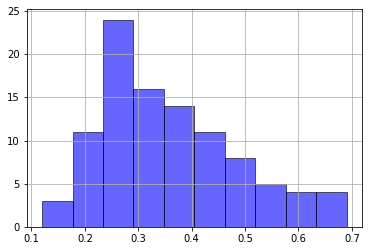

In [14]:
survey['score'].hist(color='b',edgecolor='k',alpha=0.6)